# Assignment 8 - EE18BTECH11050 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroML.decorators import pickle_results
from astroML.datasets import fetch_sdss_specgals
from astroML.correlation import bootstrap_two_point_angular

### Ques 1. 

In [5]:
A = pd.read_csv("datafile.csv")
z = A['r-mag']

#Quality cuts on the data
data = A
data = data[data['r-mag'] > 17]
data = data[data['r-mag'] < 20]
data = data[data['spread_model'] < 0.002]

def compute_results(n_bins=16, n_bootstraps=10,  method='landy-szalay', rseed=0):
    np.random.seed(rseed)
    bins = 10 ** np.linspace(np.log10(1. / 60.), np.log10(6), 16)

    results = [bins]
    for D in [data]:
        results += bootstrap_two_point_angular(D['#RA'],
                                               D['DEC'],
                                               bins=bins,
                                               method=method,
                                               Nbootstraps=n_bootstraps)

    return results

(bins, b_corr, b_corr_err, b_bootstraps) = compute_results()

bin_centers = 0.5 * (bins[1:] + bins[:-1])

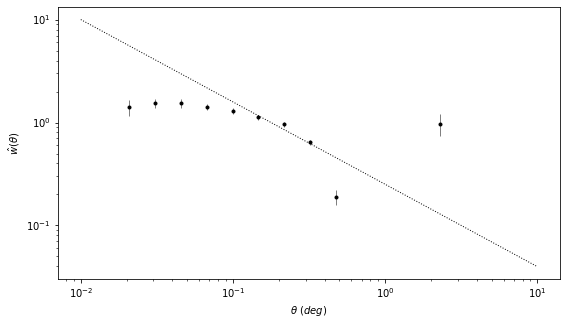

In [6]:
# Plot the results

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, xscale='log', yscale='log')
ax.errorbar(bin_centers, b_corr, b_corr_err,fmt='.k', ecolor='gray', lw=1)
t = np.array([0.01, 10])
ax.plot(t, 10 * (t / 0.01) ** -0.8, ':k', linewidth=1)
ax.set_xlabel(r'$\theta\ (deg)$')
ax.set_ylabel(r'$\hat{w}(\theta)$')
plt.savefig("Output_Q1")
plt.show()